# Datos

In [1]:
"""
Archivo Creado: 20 Junio - 02:15 P. M.
Escrito Por: José Vidal Cardona Rosas 
"""
# Importamos las librerias que vamos a utilizar 
import pandas as pd
import numpy as np
import seaborn as sns
# Importamos los modelos que vamos a utilizar y las métricas para evaluar
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


#Importamos los datos con los que vamos a trabajar
titanic_data_train = pd.DataFrame(pd.read_csv('/content/train.csv'))
titanic_data_test = pd.DataFrame(pd.read_csv('/content/test.csv'))
Y_real = pd.DataFrame(pd.read_csv('/content/gender_submission.csv'))


titanic_data_train.columns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [2]:
titanic_data_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
Y_real.columns 

Index(['PassengerId', 'Survived'], dtype='object')

**Trabajaremos con el dataset "train" y usaremos
el dataset "test" para medir la eficiencia en la 
predicción del modelo que usemos. Posteriormente
usaremos los valores "Y_real" para comparar
con test y medir el MAE (Mean Absolute Error).**

## Ingeniería de datos

In [4]:
titanic_data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> Una vez cargados los datos notamos la existencia de valores faltantes en columnas como *Cabin*, 
por lo que tendremos que ver si es un problema por el cual preocuparnos o podemos continuar sin ningún problema.

**Hacemos entonces un mapa de calor para detectar los valores faltantes**

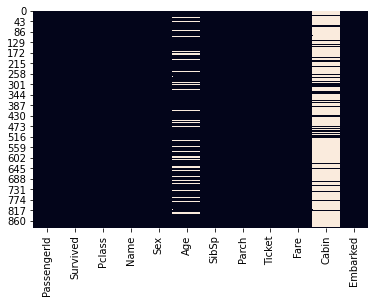

In [5]:
sns.heatmap(titanic_data_train.isnull(), cbar=False)

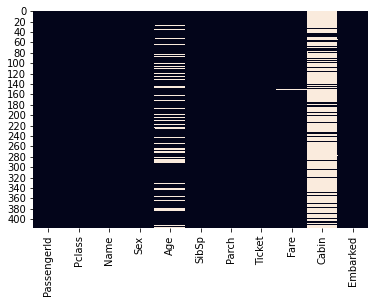

In [6]:
sns.heatmap(titanic_data_test.isnull(), cbar=False)

> Observamos que tenemos una gran mayoría de valores faltantes (tanto para el dataset **train** y el dataset **test**) para la columna *Cabin* por lo que lo **ideal es que no la útilicemos para entrenar
a nuestros modelos.** 

> En el caso de la columna *Age* notamos que son menos de la mitad los valores faltantes, por lo que **podríamos eliminar la columna o obtener el promedio de edad y asignar ese valor a los datos faltantes de la columna Age.** 

Procedemos a eliminar la columna *Cabin* y a asignar el promedio de edad a los valores nulos en la columna *Age*

In [7]:
# INGENIERIA DE DATOS #

# Dado que que nuestro dataset "TEST" que usaremos para probar le eficiencia del modelo 
# también contiene valores, también haremos infeniería de datos sobre el. 

#****Eliminar la columna "Cabin" de ambos datasets
titanic_data_train.drop(['Cabin'], axis = 1, inplace=True)
titanic_data_test.drop(['Cabin'], axis = 1, inplace=True)

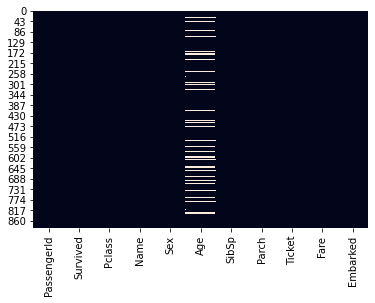

In [8]:
sns.heatmap(titanic_data_train.isnull(), cbar=False)

Observamos que en el dataset train ya no tenemos la 
columna de Cabin y por lo tanto ya no tenemos esos
valores faltantes. 

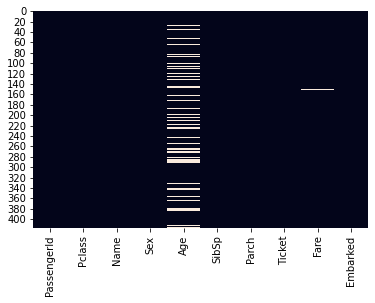

In [9]:
sns.heatmap(titanic_data_test.isnull(), cbar=False)

En el caso del dataset test tenemos un valor faltante en *Fare* por lo que al igual que la columna *Age*, el valor 
faltante de *Fare* lo rellenaremos con el promedio.

In [10]:
#****Rellenar valores faltantes con el promedio
# Remplazamos los valos "NaN" con cero para obtener la media con la que 
# rellenaremos los valores faltantes

def ReplaceValue(dfCol):
  """
  dfCol: Columna del dataframe a la que se le remplazarán valores
  """
  AgeSum = 0
  for value in dfCol: 
    if (str(value)) == "nan":
      pass
    else: 
      value = float(value)
      AgeSum += value

  # Convertimos a entero el promedio para usarlo en la edad
  mean = int(AgeSum/len(dfCol))
  return (mean)

MeanForTrain = ReplaceValue(titanic_data_train.Age)
titanic_data_train['Age'].fillna(MeanForTrain, inplace=True)
MeanForTest = ReplaceValue(titanic_data_test.Age)
titanic_data_test['Age'].fillna(MeanForTest, inplace=True)

# En el caso de los valores faltantes de la columna "Fare"
# Ya que son muy pocos, lo rellenaremos con con valores de registros 
# anteriores a ellos
#ffill remplaza el valor NaN con el del registro anterior
#bfill lo hace pero con el del registro siguiente
titanic_data_test['Fare'].fillna(method='ffill', inplace=True)


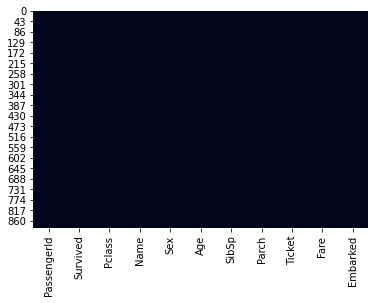

In [11]:
sns.heatmap(titanic_data_train.isnull(), cbar=False)

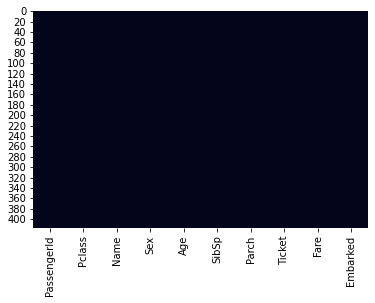

In [12]:
sns.heatmap(titanic_data_test.isnull(), cbar=False)

**Apoyandonos del mapa de calor observamos que ya no hay valores
faltantes en nuestros datos por lo que podemos proceder a probar algunos modelos de clasificación** 

In [13]:
titanic_data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Observamos que en los datos tenemos valores que no son numericos por lo que tendremos que convertirlos a numericos para poder trabajar con ellos**

**Campos como:** *Name, PassengerId no nos aportan conocimiento 
por lo que no los contemplaremos para el modelo*

In [14]:
titanic_data_train['Sex'].replace({'male':0,'female':1}, inplace = True)
titanic_data_test['Sex'].replace({'male':0,'female':1}, inplace = True)

In [15]:
aux = list(titanic_data_train['Ticket'])
titanic_data_train['Ticket'].replace(list(set(aux)), [x for x in range(1, len(set(aux))+1)], inplace=True)
aux2 = list(titanic_data_test['Ticket'])
titanic_data_test['Ticket'].replace(list(set(aux2)), [x for x in range(1, len(set(aux2))+1)], inplace=True)

In [16]:
aux3 = list(titanic_data_train['Embarked'])
titanic_data_train['Embarked'].replace(list(set(aux3)), [x for x in range(1, len(set(aux3))+1)], inplace=True)
aux4 = list(titanic_data_train['Embarked'])
titanic_data_train['Embarked'].replace(list(set(aux4)), [x for x in range(1, len(set(aux4))+1)], inplace=True)

**Una vez remplazados los datos de texto por numericos
procedemos a escoger las columnas que nos serviran para 
entrenar los modelos**

## Elección de características y el valor a predecir

In [17]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']
X = titanic_data_train[features] # Choosing "Features" 
y = titanic_data_train.Survived # Prediction target

In [18]:
# Partimos nuestro conjunto de entrenamiento en datos de validacióón y de entrenamiento
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Prueba de modelos para la competencia

**Una vez que tenemos los datos de entrenamiento y validación
procedemos a evaluar los modelos con los que vamos a trabajar**

**Dado que se trata de un problema de clasificación probaremos con:**
* Árboles de decisión
* Máquinas de soporte vectorial (SVM por sus siglas en inglés)
* Regresión logística 

> Estoy procediendo bajo la premisa de que los datos son linealmente separables.


**Building the model**

Para construir nuestro modelo debemos hacernos algunas preguntas:
* Definiendo: ¿Qué tipo de modelo será? Evalua que tipo de problema estas resolviendo.
* Entrenando: Una vez tienes tu modelo, lo vas a entrenar y este capturara patrones en los datos (el corazón del modelaje).
* Predicción: Como la palabra lo dice, el modelo se encargara de predecir los resultados basado en los datos con los que fue entrenando.
* Evaluación: Tenemos que determinar que tan preciso fue el modelo, si fue el mejor, si podemos mejorarlo, etc.

## Árboles De Decisión

In [19]:
 # ------------------------------------ÁRBOLES DE DECISIÓN
 from sklearn.tree import DecisionTreeClassifier
 # Definimos nuestro modelo y especificamos un random_state
 # para garantizar los mismo resultados en cada ejecución
 decision_Tree_Model = DecisionTreeClassifier(random_state=1)

In [20]:
# Fit Model
decision_Tree_Model.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [21]:
# Probamos el modelo con los datos que ya tenemos (antes de que fuesen separados)
# para ver como funciona el modelo
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,0,22.0,1,0,391,7.2500,1
1,1,1,38.0,1,0,62,71.2833,4
2,3,1,26.0,0,0,192,7.9250,1
3,1,1,35.0,1,0,522,53.1000,1
4,3,0,35.0,0,0,201,8.0500,1


In [22]:
print("Valores de la predicción:", decision_Tree_Model.predict(X.head()))

Valores de la predicción: [0 1 0 1 0]


In [23]:
print("Valores reales:\n",y.head())

Valores reales:
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


Observamos que funciono correctamente al comparar los valores de la predicción con los valores reales. Podemos contiuar sin problemas

### Validación del modelo Tree

In [36]:
# En la mayoria de aplicaciones, la medida para evaluar nuestro modelo 
# es la <<Precisión Predictiva>>
# Procedemos a usar MAE para evaluar la calidad del modelo
# MAE = Mean Absolute Error

# Tenemos entonces que la predicción de error para cada pasajero sera:
# error = actual-predictivo

# por lo que si un humano vive = 1 y al predicir obtenemos = 0
# el error es 1-0 = 1
# Haciendo uso de MAE obtenemos el promedio absoluto
from sklearn.metrics import mean_absolute_error
predict_human_survive_tree = decision_Tree_Model.predict(X)
mean_absolute_error(y, predict_human_survive_tree)

0.06958473625140292

In [25]:
# Algo que puede saltar a la vista es que usamos solo una "muestra"
# de humanos para construir y evaluar el modelo, lo cual es malo
# Estamos sesgando el resultado. Si el modelo encuentra alguna relacióón
# entre la edad y sobrevivir o no, cuando en realidad no hay relación
# podemos estar en aprietos.
# Para revertir este error hacemos uso de MAE en los datos que no se usarón
# para construir el modelo
val_predict = decision_Tree_Model.predict(val_X)
mean_absolute_error(val_y, val_predict)
# Este es el error correcto

0.27802690582959644

De esta manera, si obtenemos el MAE de cada modelo, podemos elegir un modelo sobre otro basandonos en esta medida. 
De esta manera podemos garantizar elegir un modelo que no sufra de "overfitting" o "underfitting"

### Evaluación de métricas Tree

In [26]:
# Obtenemos una estimación de predicciones
yPred = decision_Tree_Model.predict(val_X)

In [27]:
from sklearn import metrics
# Calculamos accuaracy 
# Proporción de instancias que son correctamente
# clasificadas
exactitud = metrics.accuracy_score(val_y, yPred)
exactitud

0.7219730941704036

In [28]:
# Calculamos la precisión
# Proporción de instancias clasificadas como positivas
# que son realmente positivas
precision = metrics.precision_score(val_y, yPred, average="micro")
precision

0.7219730941704036

In [29]:
# La proporcióón de casos positivos 
# que se clasifican correctamente como positivos
sensibilidad = metrics.recall_score(val_y, yPred, average="micro")
sensibilidad

0.7219730941704036

In [30]:
# Calculamos la métrica F score para una beta 
# Fbeta score es una medida que combina precisión y sensibilidad (recall)
# El puntaje Fbeta es la medida armónica de la memoria (recall) y la precisión, 
# con una puntuación más alta como mejor modelo.
metrics.fbeta_score(val_y, yPred, beta=1, average='weighted')

0.7215718513160396

## Máquinas de soporte vectorial

In [31]:
 # ------------------------------------Máquinas de soporte vectorial
from sklearn.svm import SVC
 # Definimos nuestro modelo y especificamos un random_state
 # para garantizar los mismo resultados en cada ejecución
 svc_Model = SVC(random_state=1, kernel='linear')

In [32]:
# Fit Model
svc_Model.fit(train_X, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [33]:
# Probamos el modelo con los datos que ya tenemos (antes de que fuesen separados)
# para ver como funciona el modelo
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,0,22.0,1,0,391,7.2500,1
1,1,1,38.0,1,0,62,71.2833,4
2,3,1,26.0,0,0,192,7.9250,1
3,1,1,35.0,1,0,522,53.1000,1
4,3,0,35.0,0,0,201,8.0500,1


In [34]:
print("Valores de la predicción: {0} \n Valores reales: \n{1}".format(svc_Model.predict(X.head()), y.head()))

Valores de la predicción: [0 1 1 1 0] 
 Valores reales: 
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


> **Comentario**: El resultado con un kernel "linear" es mejor que con un kernel "rbf" y "poly" pero el tiempo de entrenamiento del modelo es muy superior. 

### Validación del modelo SVM

In [35]:
# Haciendo uso de MAE obtenemos el promedio absoluto
from sklearn.metrics import mean_absolute_error
predict_human_survive_svc = svc_Model.predict(X)
mean_absolute_error(y, predict_human_survive_svc)

0.20089786756453423

In [37]:
# Reversióón de error/obtener el error correcto
val_predict = svc_Model.predict(val_X)
mean_absolute_error(val_y, val_predict)
# Este es el error correcto

0.20179372197309417

### Evaluación de métricas SVM

In [38]:
# Obtenemos una estimación de predicciones
yPred = svc_Model.predict(val_X)

In [39]:
# Calculamos accuaracy 
# Proporción de instancias que son correctamente
# clasificadas
exactitud = metrics.accuracy_score(val_y, yPred)
exactitud

0.7982062780269058

In [40]:
# Calculamos la precisión
# Proporción de instancias clasificadas como positivas
# que son realmente positivas
precision = metrics.precision_score(val_y, yPred, average="micro")
precision

0.7982062780269058

In [41]:
# La proporcióón de casos positivos 
# que se clasifican correctamente como positivos
sensibilidad = metrics.recall_score(val_y, yPred, average="micro")
sensibilidad

0.7982062780269058

In [42]:
# Calculamos la métrica F score para una beta 
# Fbeta score es una medida que combina precisión y sensibilidad (recall)
# El puntaje Fbeta es la medida armónica de la memoria (recall) y la precisión, 
# con una puntuación más alta como mejor modelo.
metrics.fbeta_score(val_y, yPred, beta=1, average='weighted')

0.7951426727592068

## Regresión logística

In [43]:
 # ------------------------------------Regresión logística
from sklearn.linear_model import LogisticRegression
 # Definimos nuestro modelo y especificamos un random_state
 # para garantizar los mismo resultados en cada ejecución
 lr_Model = LogisticRegression(random_state=1)

In [44]:
# Fit model
lr_Model.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# Probamos el modelo con los datos que ya tenemos (antes de que fuesen separados)
# para ver como funciona el modelo
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,0,22.0,1,0,391,7.2500,1
1,1,1,38.0,1,0,62,71.2833,4
2,3,1,26.0,0,0,192,7.9250,1
3,1,1,35.0,1,0,522,53.1000,1
4,3,0,35.0,0,0,201,8.0500,1


In [46]:
print("Valores de la predicción: {0} \n Valores reales: \n{1}".format(lr_Model.predict(X.head()), y.head()))


Valores de la predicción: [0 1 1 1 0] 
 Valores reales: 
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


### Validación del modelo LRegression

In [47]:
# Haciendo uso de MAE obtenemos el promedio absoluto
from sklearn.metrics import mean_absolute_error
predict_human_survive_lr = lr_Model.predict(X)
mean_absolute_error(y, predict_human_survive_lr)

0.19865319865319866

In [48]:
# Reversióón de error/obtener el error correcto
val_predict = lr_Model.predict(val_X)
mean_absolute_error(val_y, val_predict)
# Este es el error correcto

0.21076233183856502

### Evaluación de métricas LRegression

In [49]:
# Obtenemos una estimación de predicciones
yPred = lr_Model.predict(val_X)

In [50]:
# Calculamos accuaracy 
# Proporción de instancias que son correctamente
# clasificadas
exactitud = metrics.accuracy_score(val_y, yPred)
exactitud

0.7892376681614349

In [51]:
# Calculamos la precisión
# Proporción de instancias clasificadas como positivas
# que son realmente positivas
precision = metrics.precision_score(val_y, yPred, average="micro")
precision

0.7892376681614349

In [52]:
# La proporcióón de casos positivos 
# que se clasifican correctamente como positivos
sensibilidad = metrics.recall_score(val_y, yPred, average="micro")
sensibilidad

0.7892376681614349

In [53]:
# Calculamos la métrica F score para una beta 
# Fbeta score es una medida que combina precisión y sensibilidad (recall)
# El puntaje Fbeta es la medida armónica de la memoria (recall) y la precisión, 
# con una puntuación más alta como mejor modelo.
metrics.fbeta_score(val_y, yPred, beta=1, average='weighted')

0.7854444906208818

# Discusión de resultados